In [1]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_finance import candlestick_ohlc
import yfinance as yf
import stockstats
from stockstats import StockDataFrame
from dateutil import tz

import tradingview_ta as tv
import binance
import json
from binance.client import Client
with open('.secret', 'r') as f:
    secs = json.load(f)
%pylab inline

/Users/macbook/.pyenv/versions/3.7.3/lib/python3.7/site-packages/mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
# get symbols
symbols = set()
for root, dirs, files in os.walk('../data'):
    for f in files:
        if f.endswith('.csv'):
            symbols.add(f.split('_')[0])

In [4]:
d = pd.read_csv('../data/BTCUSDT_1d.csv')

In [7]:
d.time = d.time.apply(lambda x: date2num(datetime.datetime.strptime(x.split('T')[0], '%Y-%m-%d')))

In [332]:
symbols

{'.',
 'AAVEUSDT',
 'ADAUSDT',
 'ALGOUSDT',
 'ATOMUSDT',
 'AVAXUSDT',
 'BALUSDT',
 'BANDUSDT',
 'BATUSDT',
 'BCHUSDT',
 'BLZUSDT',
 'BNBUSDT',
 'BTCUSDT',
 'BZRXUSDT',
 'COMPUSDT',
 'CRVUSDT',
 'CVCUSDT',
 'DASHUSDT',
 'DOGEUSDT',
 'DOTUSDT',
 'EGLDUSDT',
 'ENJUSDT',
 'EOSUSDT',
 'ETCUSDT',
 'ETHUSDT',
 'FILUSDT',
 'FLMUSDT',
 'FTMUSDT',
 'HNTUSDT',
 'ICXUSDT',
 'IOSTUSDT',
 'IOTAUSDT',
 'KAVAUSDT',
 'KNCUSDT',
 'KSMUSDT',
 'LENDUSDT',
 'LINKUSDT',
 'LRCUSDT',
 'LTCUSDT',
 'MATICUSDT',
 'MKRUSDT',
 'NEARUSDT',
 'NEOUSDT',
 'OCEANUSDT',
 'OMGUSDT',
 'ONTUSDT',
 'QTUMUSDT',
 'RENUSDT',
 'RLCUSDT',
 'RSRUSDT',
 'RUNEUSDT',
 'SNXUSDT',
 'SOLUSDT',
 'SRMUSDT',
 'STORJUSDT',
 'SUSHIUSDT',
 'SXPUSDT',
 'THETAUSDT',
 'TOMOUSDT',
 'TRBUSDT',
 'TRXUSDT',
 'UNIUSDT',
 'VETUSDT',
 'WAVESUSDT',
 'XLMUSDT',
 'XMRUSDT',
 'XRPUSDT',
 'XTZUSDT',
 'YFIIUSDT',
 'YFIUSDT',
 'ZECUSDT',
 'ZILUSDT',
 'ZRXUSDT'}

In [150]:
def draw_candle(data, alpha=1):
    data_f = list(map(lambda x: [x[0], float(x[1]), float(x[2]), float(x[3]), float(x[4])], data))
#     fig,ax=plt.subplots(facecolor="white",figsize=(12,8))
    
#     fig.subplots_adjust(bottom=0.1)
#     ax.xaxis_date()
    candlestick_ohlc(ax,data_f,width=0.5,colorup='r',colordown='green', alpha=alpha) 
    plt.xticks(rotation=30)
    plt.title('K-line')
    plt.xlabel('time')
    plt.ylabel('price')
    plt.grid(True)

In [156]:
client = Client(secs['binance_key'], secs['binance_secret'])

# valid intervals - 1m, 3m, 5m, 15m, 30m, 1h, 2h, 4h, 6h, 8h, 12h, 1d, 3d, 1w, 1M

# get timestamp of earliest date data is available
# timestamp = client._get_earliest_valid_timestamp('BTCUSDT', '1d')
# print(timestamp)

# request historical candle (or klines) data
def getDataBinance(symbol, interval='1d'):
    timestamp = client._get_earliest_valid_timestamp(symbol, interval)
    bars = client.get_historical_klines(symbol, interval, timestamp)
    b = pd.DataFrame(bars, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume', 'fd', 'fd', 'fd', 'fd', 'fd', 'fd'])
    b.iloc[:, :6].to_csv('../data/binance_api/{}_5m.csv'.format(symbol), index=False)
    return bars

# bars = getDataBinance('BTCUSDT')


In [126]:
bars = pd.read_csv('../data/binance_api/BTCUSDT.csv')

In [165]:
bars_5m = pd.read_csv('../data/binance_api/BTCUSDT_5m.csv')

In [93]:
#client._get_earliest_valid_timestamp()

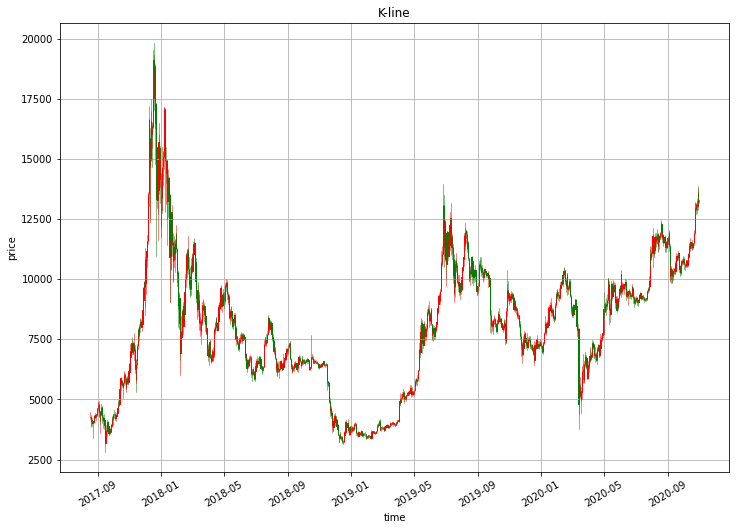

In [18]:
draw_candle(d.values)

In [14]:
d.head()

,time,open,high,low,close,volume,turnover,trades,taker_buy_volume
0,736559.0,4261.48,4485.39,4200.74,4285.08,795.150377,3.454770e+06,3427,616.248541
1,736560.0,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,5233,972.868710
2,736561.0,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,2153,274.336042
3,736562.0,4120.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,2321,376.795947
4,736563.0,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,3972,557.356107


In [123]:
bars_r = list(map(lambda x: [datetime.datetime.fromtimestamp(x[0]//1000).toordinal(), x[1], x[2], x[3], x[4]], bars))
draw_candle(bars_r)

TypeError: unsupported operand type(s) for //: 'str' and 'int'

In [12]:
# get market depth
depth = client.get_order_book(symbol='BNBBTC')

# place a test market buy order, to place an actual order use the create_order function
order = client.create_test_order(
    symbol='BNBBTC',
    side=Client.SIDE_BUY,
    type=Client.ORDER_TYPE_MARKET,
    quantity=100)

# get all symbol prices
prices = client.get_all_tickers()

# withdraw 100 ETH
# check docs for assumptions around withdrawals
from binance.exceptions import BinanceAPIException, BinanceWithdrawException
try:
    result = client.withdraw(
        asset='ETH',
        address='<eth_address>',
        amount=100)
except BinanceAPIException as e:
    print(e)
except BinanceWithdrawException as e:
    print(e)
else:
    print("Success")

# fetch list of withdrawals
withdraws = client.get_withdraw_history()

# fetch list of ETH withdrawals
eth_withdraws = client.get_withdraw_history(asset='ETH')

# get a deposit address for BTC
address = client.get_deposit_address(asset='BTC')

# start aggregated trade websocket for BNBBTC
def process_message(msg):
    print("message type: {}".format(msg['e']))
    print(msg)
    # do something

from binance.websockets import BinanceSocketManager
bm = BinanceSocketManager(client)
bm.start_aggtrade_socket('BNBBTC', process_message)
bm.start()

# get historical kline data from any date range

# fetch 1 minute klines for the last day up until now
klines = client.get_historical_klines("BNBBTC", Client.KLINE_INTERVAL_1MINUTE, "1 day ago UTC")

# fetch 30 minute klines for the last month of 2017
klines = client.get_historical_klines("ETHBTC", Client.KLINE_INTERVAL_30MINUTE, "1 Dec, 2017", "1 Jan, 2018")

# fetch weekly klines since it listed
klines = client.get_historical_klines("NEOBTC", Client.KLINE_INTERVAL_1WEEK, "1 Jan, 2017")

BinanceWithdrawException: -1022=Signature for this request is not valid.
message type: error
{'e': 'error', 'm': 'Max reconnect retries reached'}


In [20]:
# read seasonal data

In [23]:
s1 = pd.read_csv('/Volumes/Untitled/data/binance_futures/BTCUSD/201225/BTCUSD_201225_T_TRADE_20200901.csv')

In [25]:
d.head()

,time,open,high,low,close,volume,turnover,trades,taker_buy_volume
0,736559.0,4261.48,4485.39,4200.74,4285.08,795.150377,3.454770e+06,3427,616.248541
1,736560.0,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,5233,972.868710
2,736561.0,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,2153,274.336042
3,736562.0,4120.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,2321,376.795947
4,736563.0,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,3972,557.356107


In [159]:
def data2ohlc(path):
    def sFile(fname):
        # time	open	high	low	close	volume	turnover	trades	taker_buy_volume
        d = pd.read_csv(fname, engine='python')
        if len(d) == 0:
            print(fname)
            return
        stime = datetime.datetime.fromtimestamp(d['time'][0] // 1000).toordinal()
        o = d['price'][0]
        c = d['price'][len(d)-1]
        l = min(d['price'])
        h = max(d['price'])
        volume = sum(d['qty'])
        
        return stime, o, h, l, c, volume
    
    r = []
    for root, dirs, files in os.walk(path):
        for f in files:
            if f.endswith('csv'):
                r.append(sFile(path+f))
            
    return r

def data2ohlc5m(path):
    def sFile(fname):
        # time	open	high	low	close	volume	turnover	trades	taker_buy_volume
        d = pd.read_csv(fname, engine='python')
        if len(d) == 0:
            print(fname)
            return
        stime = datetime.datetime.fromtimestamp(d['time'][0] // 1000).toordinal()
        o = d['price'][0]
        c = d['price'][len(d)-1]
        l = min(d['price'])
        h = max(d['price'])
        volume = sum(d['qty'])
        
        return stime, o, h, l, c, volume
    
    r = []
    for root, dirs, files in os.walk(path):
        for f in files:
            if f.endswith('csv'):
                r.append(sFile(path+f))
            
    return r
            

In [179]:
datetime.datetime.fromtimestamp(121222121+5*60)

datetime.datetime(1973, 11, 4, 8, 53, 41)

In [177]:
datetime.datetime.fromtimestamp(121222122)

datetime.datetime(1973, 11, 4, 8, 48, 42)

In [168]:
s0925 = data2ohlc('/Volumes/Untitled/data/binance_futures/BTCUSD/210326/')

In [169]:
ts = list(map(lambda x: x[0], s0925))
t1 = min(ts)
t2 = max(ts)

In [139]:
bars.head()
bars['timestamp'] = bars.timestamp.apply(lambda x: datetime.datetime.fromtimestamp(x//1000).toordinal())

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


<Figure size 432x288 with 0 Axes>

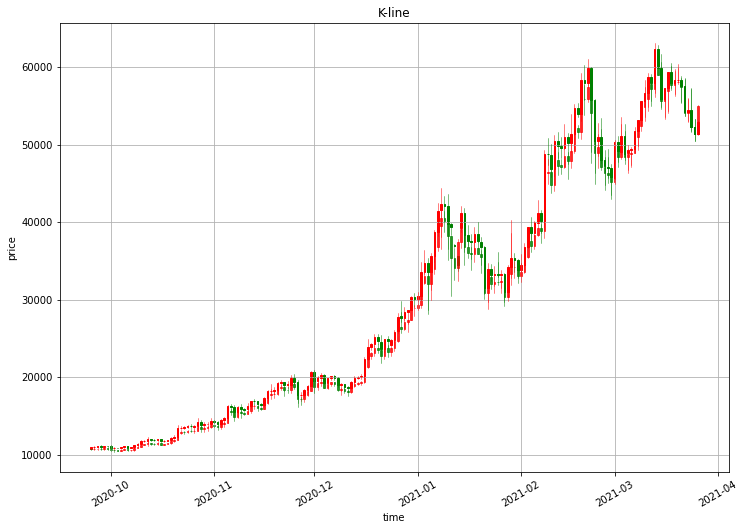

In [170]:
plt.figure()
fig,ax=plt.subplots(facecolor="white",figsize=(12,8))
fig.subplots_adjust(bottom=0.1)
ax.xaxis_date()
draw_candle(s0925)
draw_candle(bars[bars.timestamp>=t1][bars.timestamp<=t2].values, 0.7)

In [158]:
s0925[:10]

[(737669, 12061.3, 12520.5, 11922.7, 12379.3, 289922.0),
 (737670, 12373.4, 12404.5, 11477.3, 11721.5, 331958.0),
 (737671, 11719.0, 11803.7, 10055.0, 10209.0, 787675.0),
 (737672, 10209.0, 10812.1, 10050.0, 10632.4, 470145.0),
 (737673, 10636.5, 10756.1, 9950.0, 10337.3, 425987.0),
 (737674, 10335.5, 10515.1, 10155.3, 10418.3, 122479.0),
 (737675, 10431.3, 10606.2, 10036.7, 10554.4, 142604.0),
 (737676, 10570.6, 10635.5, 10005.5, 10284.7, 182093.0),
 (737677, 10287.1, 10514.5, 10135.4, 10387.5, 97712.0),
 (737678, 10381.9, 10655.1, 10381.9, 10482.7, 116153.0)]

In [194]:
# calculate the price difference  for 5m candle data
# for one day

coin = pd.read_csv('/Volumes/Untitled/data/binance_futures/BTCUSD/BTCUSDT_T_TRADE_202012/BTCUSDT_T_TRADE_20201201.csv')
coinf = pd.read_csv('/Volumes/Untitled/data/binance_futures/BTCUSD/201225/BTCUSD_201225_T_TRADE_20201201.csv')

In [283]:
# for one day, set the timestamp for this date first as starting point
tzone = tz.gettz('greenwich')
def getDiffPerc(pcoin, pcoinf, dateStr):
    #dateStr = pcoin.rstrip('.csv').split('_')[-1]
    #stime = datetime.datetime(2020,12,1, tzinfo=tzone)
    #sts = stime.timestamp()
    sts = datetime.datetime.strptime(dateStr+'+00:00', '%Y%m%d%z').timestamp()
    
    coin = pd.read_csv(pcoin)
    coinf = pd.read_csv(pcoinf)
    
    coinf['1m'] = (coinf.time-(sts*1000)) // (60*1000)
    coinf_1m = coinf.groupby('1m').mean()
    coinf_1m['ma5'] = coinf_1m.price.rolling(window=5).mean()

    coin['1m'] = (coin.time-(sts*1000)) // (60*1000)
    coin_1m = coin.groupby('1m').mean()
    coin_1m['ma5'] = coin_1m.price.rolling(window=5).mean()

    diff_1m = (coinf_1m.ma5 - coin_1m.ma5) / coin_1m.price
    
    return list(zip(diff_1m.index.values*60+sts, diff_1m.values))

In [288]:
# through all Seasonal futures 1225:
futuresPath = '/Volumes/Untitled/data/binance_futures/BTCUSD/201225/'
coinPath = '/Volumes/Untitled/data/binance_futures/BTCUSD/BTCUSDT/BTCUSDT_T_TRADE_{}.csv'
decFuturesDiffPerc = []
notFound = []
for root, dirs, files in os.walk(futuresPath):
    for f in files:
        if f.endswith('.csv'):
            dateStr = f.rstrip('.csv').split('_')[-1]
            try:
                decFuturesDiffPerc.extend(getDiffPerc(futuresPath+f, coinPath.format(dateStr), dateStr))
            except FileNotFoundError:
                notFound.append(dateStr)

In [314]:
for d in notFound:
    decFuturesDiffPerc.extend(getDiffPerc(futuresPath+'BTCUSD_201225_T_TRADE_{}.csv'.format(d), coinPath.format(d), dateStr))

Text(0.5, 1.0, 'BTC perp vs. BTC Dec futures')

<Figure size 432x288 with 0 Axes>

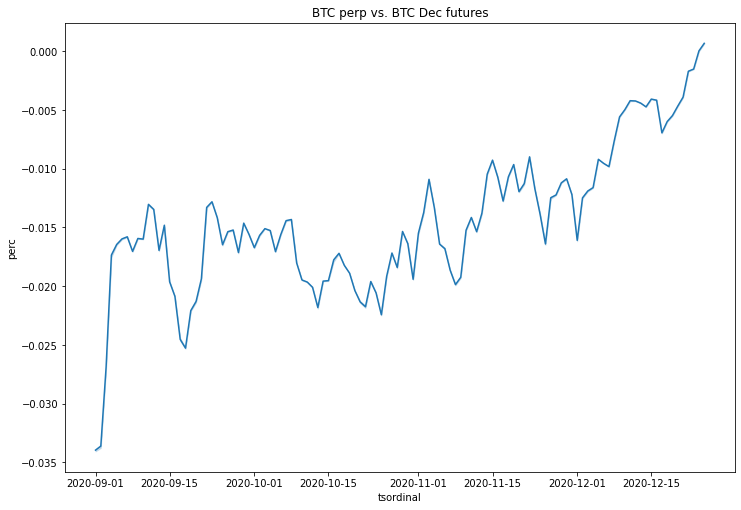

In [330]:
data = pd.DataFrame(decFuturesDiffPerc,columns=['ts', 'perc'])

plt.figure()
fig,ax=plt.subplots(facecolor="white",figsize=(12,8))
fig.subplots_adjust(bottom=0.1)
ax.xaxis_date()
data['tsordinal'] = data.ts.apply(lambda x: datetime.datetime.fromtimestamp(x).toordinal())
sns.lineplot(x='tsordinal', y='perc', data=data, err_style='band')
plt.title('BTC perp vs. BTC Dec futures')

In [315]:
# through all Seasonal futures 2103:
futuresPath = '/Volumes/Untitled/data/binance_futures/BTCUSD/210326/'
coinPath = '/Volumes/Untitled/data/binance_futures/BTCUSD/BTCUSDT/BTCUSDT_T_TRADE_{}.csv'
marFuturesDiffPerc = []
marNotFound = []
for root, dirs, files in os.walk(futuresPath):
    for f in files:
        if f.endswith('.csv'):
            dateStr = f.rstrip('.csv').split('_')[-1]
            try:
                marFuturesDiffPerc.extend(getDiffPerc(futuresPath+f, coinPath.format(dateStr), dateStr))
            except FileNotFoundError:
                marNotFound.append(dateStr)

Text(0.5, 1.0, 'BTC perp vs BTC march futures')

<Figure size 432x288 with 0 Axes>

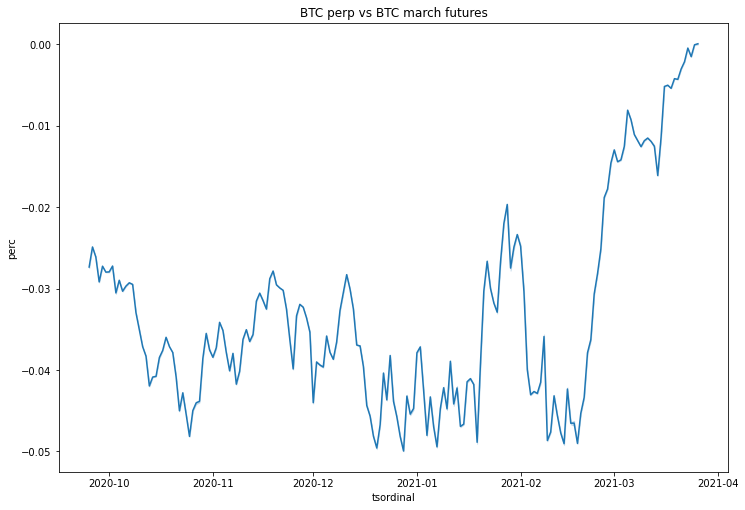

In [331]:
data = pd.DataFrame(marFuturesDiffPerc,columns=['ts', 'perc'])

plt.figure()
fig,ax=plt.subplots(facecolor="white",figsize=(12,8))
fig.subplots_adjust(bottom=0.1)
ax.xaxis_date()
data['tsordinal'] = data.ts.apply(lambda x: datetime.datetime.fromtimestamp(x).toordinal())
sns.lineplot(x='tsordinal', y='perc', data=data, err_style='band')

plt.title('BTC perp vs BTC march futures')

In [186]:
# calculate the price difference for candle data
bars_5m['timestamp'] = bars_5m.timestamp.apply(lambda x: datetime.datetime.timestamp(x))

In [187]:
bars_5m.head()

,timestamp,open,high,low,close,volume
0,1.502899e+09,4261.48,4280.56,4261.48,4261.48,2.189061
1,1.502899e+09,4261.48,4261.48,4261.48,4261.48,0.000000
2,1.502899e+09,4261.48,4261.48,4261.48,4261.48,0.000000
3,1.502899e+09,4261.48,4264.88,4261.48,4261.48,0.484666
4,1.502899e+09,4264.88,4266.29,4264.88,4266.29,2.328570


In [327]:
# get symbols
symbols = set()
for root, dirs, files in os.walk('/Volumes/Untitled/data/binance_ohlcv/'):
    for f in files:
        if f.endswith('.csv'):
            symbols.add(f.split('_')[0])